In [45]:
import pandas as pd
import numpy as np

from matplotlib import colors, patches
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

import os

In [46]:
plt.rcParams['axes.titlepad'] = 20 

In [47]:
# Value to change to get correct paths
# Put the path where the data file is
data_path = '../Romain/data/'
fig_path = '../Romain/figures/'

In [48]:
inputs_path = data_path + 'inputs/'
intermediate_path = data_path + 'intermediate/'
output_path = data_path + 'outputs/with_irrig/'

base_path = inputs_path + 'Base/'
diet_path = inputs_path + 'diet/'
pop_path = inputs_path + 'population/'

data_2000_no_irrig_path = intermediate_path + 'Baseline_df_iterations/'
data_2000_path = intermediate_path + 'Baseline_df_iterations/with_irrig/'

#data_2050_no_irrig_path = intermediate_path + 'Future_dfs/All_change/'
data_2050_path = intermediate_path + 'Future_dfs/All_change+irrig/'

data_2050_gdp_cont_path = data_2050_path + 'gdp_cont/original/'
data_2050_gdp_income_path = data_2050_path + 'gdp_cat_income/original/'
data_2050_gdp_stat_path = data_2050_path + 'gdp_cat_stat/original/'

data_2050_gdp_cont_clustered_path = data_2050_path + 'gdp_cont/clustered/'
data_2050_gdp_income_clustered_path = data_2050_path + 'gdp_cat_income/clustered/'
data_2050_gdp_stat_clustered_path = data_2050_path + 'gdp_cat_stat/clustered/'

model_output_path = output_path + 'model_output/'
composite_path = output_path + 'composite/'
compare_path = output_path + 'compare/'
suff_path = output_path + 'sufficiency/'


figure_path = fig_path + '/with_irrig/'
dist_figures_path = figure_path + 'distributions/'
agg_assumption_fig_path = figure_path + 'agg_assumption/'
cluster_fig_path = figure_path + 'clusters/'
convex_hull_fig_path = figure_path + 'convex_hull/'
suff_fig_path = figure_path + 'sufficiency/'
model_fig_path = figure_path + 'models/'
sensitivity_fig_path = figure_path + 'sensitivity/'

model_path = data_path + 'models/'

In [49]:
# List all climate models and climate scenarios from files 
# Depends on the name of the files, if change will not work
files_2050 = os.listdir(data_2050_gdp_cont_path)
files_2050 = [filename for filename in files_2050 if 'ssp' in filename]

climate_models, climate_scenarios = [], []

for file in files_2050:
    if len(file) == 11:
        climate_models.append(file[:2])
        climate_scenarios.append(file[3:7])

climate_models = list(set(climate_models))
climate_models.sort()
climate_scenarios = list(set(climate_scenarios))
climate_scenarios.sort()
climate_models, climate_scenarios

(['cc', 'gs', 'he', 'mr'], ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5'])

## Original DF

In [71]:
# The original dataframe containing the 2000 data
original_df = pd.read_csv(data_2000_path + 'baseline_df.csv', index_col='pixel_id', na_values=[-9999])

In [72]:
log_gdp_pc = original_df['log_GDP_pc']
unique_log_gdp_pc = log_gdp_pc.drop_duplicates()

gdp_pc = log_gdp_pc.apply(lambda v: np.exp(v))
gdp_pc = gdp_pc.rename('GDP_pc')
unique_gdp_pc = gdp_pc.drop_duplicates()

In [73]:
gdp_pc

pixel_id
1272549    31.700280
1276867    31.700280
1276868    31.700280
1298466    31.700280
1298467    31.700280
             ...    
7539738    13.613883
7539739    13.613883
7539740    13.613883
7539741    13.613883
7544061    13.613883
Name: GDP_pc, Length: 906797, dtype: float64

In [74]:
unique_log_gdp_pc

pixel_id
1272549    3.456326
1398023    2.645882
1436608    3.519347
1458060    3.844704
1527103    3.480308
             ...   
5817230    2.248132
6003016    1.558943
6149861    0.362325
6226595    2.533334
6484238    3.234197
Name: log_GDP_pc, Length: 161, dtype: float64

In [75]:
unique_gdp_pc

pixel_id
1272549    31.700280
1398023    14.095874
1436608    33.762367
1458060    46.744829
1527103    32.469727
             ...    
5817230     9.470030
6003016     4.753794
6149861     1.436665
6226595    12.595429
6484238    25.385989
Name: GDP_pc, Length: 161, dtype: float64

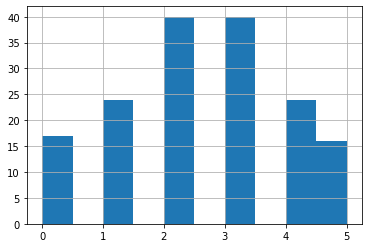

In [76]:
n_buckets = 6
buckets = [-np.inf, unique_gdp_pc.quantile(0.1), unique_gdp_pc.quantile(0.25),
           unique_gdp_pc.quantile(0.5), unique_gdp_pc.quantile(0.75), unique_gdp_pc.quantile(0.9), np.inf]

cut = pd.cut(unique_gdp_pc, buckets, labels=range(n_buckets))
cut.hist()

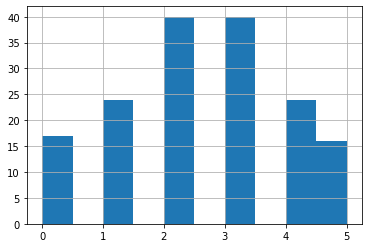

In [77]:
n_buckets = 6
buckets_log = [-np.inf, unique_log_gdp_pc.quantile(0.1), unique_log_gdp_pc.quantile(0.25),
           unique_log_gdp_pc.quantile(0.5), unique_log_gdp_pc.quantile(0.75), unique_log_gdp_pc.quantile(0.9), np.inf]

cut_log = pd.cut(unique_log_gdp_pc, buckets_log, labels=range(n_buckets))
cut_log.hist()

In [79]:
buckets_log

[-inf,
 -0.007533559812710237,
 0.7217658259188409,
 1.9318438907836333,
 2.8090612266844377,
 3.480308186176247,
 inf]

In [13]:
(cut != cut_log).any()
# Same if False

False

In [14]:
cut.head()

pixel_id
1272549    4
1398023    3
1436608    5
1458060    5
1527103    4
Name: GDP_pc, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [15]:
countries = pd.read_csv(base_path + 'country_ids.csv')
countries_names = pd.read_csv(base_path + 'country_names.csv',encoding='latin-1')
countries = countries[['country_id','pixel_id']].merge(countries_names[['base_id','ISO3','name', 'sovereignt']],right_on='base_id',left_on='country_id',how='right')

In [16]:
countries.head()

,country_id,pixel_id,base_id,ISO3,name,sovereignt
0,91.0,330087.0,91,GRL,Greenland,Denmark
1,91.0,330088.0,91,GRL,Greenland,Denmark
2,91.0,330089.0,91,GRL,Greenland,Denmark
3,91.0,330090.0,91,GRL,Greenland,Denmark
4,91.0,334378.0,91,GRL,Greenland,Denmark


In [17]:
unique_gdp_pc_country = countries.merge(unique_gdp_pc, right_on='pixel_id', left_on='pixel_id')
unique_gdp_pc_country.head()

,country_id,pixel_id,base_id,ISO3,name,sovereignt,GDP_pc
0,38.0,1555872.0,38,CAN,Canada,Canada,35.331981
1,190.0,1398023.0,190,RUS,Russia,Russia,14.095874
2,190.0,1950878.0,190,RUS,Russia,Russia,6.079101
3,168.0,1458060.0,168,NOR,Norway,Norway,46.744829
4,237.0,2113498.0,237,USA,United States of America,United States of America,42.164287


In [18]:
unique_gdp_pc_country[unique_gdp_pc_country['ISO3'] == 'PRT']

,country_id,pixel_id,base_id,ISO3,name,sovereignt,GDP_pc
47,184.0,2486056.0,184,PRT,Portugal,Portugal,21.600412


In [19]:
unique_gdp_pc_country[unique_gdp_pc_country['ISO3'] == 'GHA']

,country_id,pixel_id,base_id,ISO3,name,sovereignt,GDP_pc
116,83.0,4088876.0,83,GHA,Ghana,Ghana,1.478436


## Normalized DF

In [20]:
df_2000 = pd.read_csv(data_2000_path + 'clustered_2000.csv', index_col='pixel_id')
df_2000.head()

,nutrient_availability_index,oxygen_availability_index,workability_index,protected_areas_index,nutrient_retention_index,toxicity_index,excess_salts_index,rooting_conditions_index,slope,Annual Mean Temperature,...,fertl_c3per,fertl_c4ann,log_altitude,log_GDP_pc,irrig_c3ann,irrig_c3per,irrig_c3nfx,irrig_c4ann,irrig_c4per,label_10
pixel_id,,,,,,,,,,,,,,,,,,,,,
1272549,0.333333,0.500000,0.0,1.0,0.166667,0.0,0.0,0.0,-0.153686,-1.475497,...,-0.391367,-0.893066,-1.196992,1.169662,-0.408186,-0.408186,-0.408186,-0.408186,-0.408186,3
1276867,0.333333,0.500000,0.0,0.0,0.166667,0.0,0.0,0.0,-0.044311,-1.450093,...,-0.672494,-0.893066,-1.494671,1.169662,-0.408186,-0.408186,-0.408186,-0.408186,-0.408186,3
1276868,0.333333,0.333333,0.0,0.0,0.333333,0.0,0.0,0.0,-0.064612,-1.451896,...,-0.672494,-0.893066,-1.510069,1.169662,-0.408186,-0.408186,-0.408186,-0.408186,-0.408186,3
1298466,0.333333,0.500000,0.0,1.0,0.166667,0.0,0.0,0.0,-0.029986,-1.373057,...,0.170901,-0.893066,-2.202117,1.169662,-0.408186,-0.408186,-0.408186,-0.408186,-0.408186,7
1298467,0.333333,0.333333,0.0,0.0,0.166667,0.0,0.0,0.0,-0.027755,-1.386652,...,0.170901,-0.893066,-1.912558,1.169662,-0.408186,-0.408186,-0.408186,-0.408186,-0.408186,7


In [21]:
unique_gdp_pc_log_norm = df_2000['log_GDP_pc'].drop_duplicates()
unique_gdp_pc_log_norm

pixel_id
1272549    1.169662
1398023    0.497054
1436608    1.221965
1458060    1.491988
1527103    1.189566
             ...   
5817230    0.166950
6003016   -0.405027
6149861   -1.398133
6226595    0.403647
6484238    0.985312
Name: log_GDP_pc, Length: 161, dtype: float64

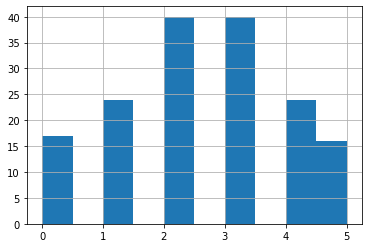

In [22]:
buckets_norm_log = [-np.inf, unique_gdp_pc_log_norm.quantile(0.1), unique_gdp_pc_log_norm.quantile(0.25),
           unique_gdp_pc_log_norm.quantile(0.5), unique_gdp_pc_log_norm.quantile(0.75), unique_gdp_pc_log_norm.quantile(0.9), np.inf]

cut_log_norm = pd.cut(unique_gdp_pc_log_norm, buckets_norm_log, labels=range(n_buckets))
cut_log_norm.hist()

In [23]:
(cut_log_norm != cut_log).any()

False

**OUFFF !!!**

## Last check with created dfs

In [35]:
gdp_2000 = pd.read_csv(data_2000_path + 'normalized_2000_gdp_cat_new.csv', index_col='pixel_id').loc[cut_log.index,'cat_gdp']

In [36]:
gdp_2000

pixel_id
1272549    4
1398023    3
1436608    5
1458060    5
1527103    4
          ..
5817230    3
6003016    2
6149861    1
6226595    3
6484238    4
Name: cat_gdp, Length: 161, dtype: int64

In [37]:
cut_log

pixel_id
1272549    4
1398023    3
1436608    5
1458060    5
1527103    4
          ..
5817230    3
6003016    2
6149861    1
6226595    3
6484238    4
Name: log_GDP_pc, Length: 161, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [38]:
(gdp_2000 != cut_log).any()

False

## Check 2050

In [56]:
model = 'cc'
ssp = 'ssp2'
df_2050 = pd.read_csv(data_2050_gdp_stat_path + '{}_{}_gdp_cat_new.csv'.format(model, ssp), index_col='pixel_id', na_values=[-9999])
df_2050_gdp_pc = df_2050['log_GDP_pc'].apply(lambda v: np.exp(v)).rename('GDP_pc')
unique_df_2050_gdp_pc = df_2050_gdp_pc.drop_duplicates()
unique_df_2050_gdp_pc.head()

/Users/Romain/anaconda3/envs/food_sufficiency/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


pixel_id
359844     55.634759
556311     41.367941
976601     67.813897
983106     63.634716
1034970    54.346179
             ...    
5817230    27.540868
6003015    11.456016
6149861     7.689047
6226595    36.862545
6458314    43.698148
Name: GDP_pc, Length: 175, dtype: float64

In [58]:
unique_gdp_pc_country_2050 = countries.merge(unique_df_2050_gdp_pc, right_on='pixel_id', left_on='pixel_id')
unique_gdp_pc_country_2050.head()

,country_id,pixel_id,base_id,ISO3,name,sovereignt,GDP_pc
0,38.0,359844.0,38,CAN,Canada,Canada,55.634759
1,190.0,556311.0,190,RUS,Russia,Russia,41.367941
2,190.0,1950878.0,190,RUS,Russia,Russia,24.542307
3,168.0,983106.0,168,NOR,Norway,Norway,63.634716
4,168.0,1034970.0,168,NOR,Norway,Norway,54.346179


In [60]:
unique_gdp_pc_country_2050[unique_gdp_pc_country_2050['ISO3'] == 'PRT']

,country_id,pixel_id,base_id,ISO3,name,sovereignt,GDP_pc
48,184.0,2481741.0,184,PRT,Portugal,Portugal,36.952874


In [70]:
unique_gdp_pc_country_2050[unique_gdp_pc_country_2050['ISO3'] == 'GHA']

,country_id,pixel_id,base_id,ISO3,name,sovereignt,GDP_pc
124,83.0,4088876.0,83,GHA,Ghana,Ghana,8.93447


In [68]:
PRT_pixel_id = unique_gdp_pc_country_2050[unique_gdp_pc_country_2050['ISO3'] == 'PRT']['pixel_id'].item()
GHA_pixel_id = unique_gdp_pc_country_2050[unique_gdp_pc_country_2050['ISO3'] == 'GHA']['pixel_id'].item()

<ipython-input-68-9b75c4c894fc>:1: FutureWarning: `item` has been deprecated and will be removed in a future version
  PRT_pixel_id = unique_gdp_pc_country_2050[unique_gdp_pc_country_2050['ISO3'] == 'PRT']['pixel_id'].item()
<ipython-input-68-9b75c4c894fc>:2: FutureWarning: `item` has been deprecated and will be removed in a future version
  GHA_pixel_id = unique_gdp_pc_country_2050[unique_gdp_pc_country_2050['ISO3'] == 'GHA']['pixel_id'].item()


In [69]:
df_2050.loc[GHA_pixel_id]

nutrient_availability_index            1.000000
oxygen_availability_index              3.000000
workability_index                      3.000000
protected_areas_index                  0.000000
nutrient_retention_index               1.000000
toxicity_index                         1.000000
excess_salts_index                     1.000000
rooting_conditions_index               1.000000
slope                                  0.007651
Annual Mean Temperature              300.000000
Mean Diurnal Range                   126.000000
Isothermality                         64.000000
Temperature Seasonality             1950.000000
Max Temperature of Warmest Month     406.000000
Min Temperature of Coldest Month     210.000000
Temperature Annual Range             196.000000
Annual Precipitation                 948.000000
Precipitation of Wettest Month       252.000000
Precipitation of Driest Month          0.000000
Precipitation Seasonality            107.000000
fertl_c3ann                           13

## Re do Fig 3 with new cut

In [80]:
# The original dataframe containing the 2000 data
original_df = pd.read_csv(data_2000_path + 'baseline_df.csv', index_col='pixel_id', na_values=[-9999])

In [72]:
log_gdp_pc = original_df['log_GDP_pc']
unique_log_gdp_pc = log_gdp_pc.drop_duplicates()

gdp_pc = log_gdp_pc.apply(lambda v: np.exp(v))
gdp_pc = gdp_pc.rename('GDP_pc')
unique_gdp_pc = gdp_pc.drop_duplicates()

In [83]:
unique_gdp_pc.sort_values()

pixel_id
4059253     0.033758
4387266     0.316466
5475958     0.415321
4226997     0.482223
3756699     0.489722
             ...    
4409939    45.496241
3147692    45.618195
1458060    46.744829
4595564    52.074518
2067191    68.733728
Name: GDP_pc, Length: 161, dtype: float64

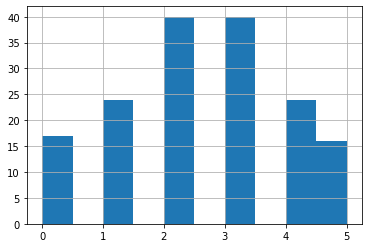

In [86]:
n_buckets = 6
buckets = [-np.inf, unique_gdp_pc.quantile(0.1), unique_gdp_pc.quantile(0.25),
           unique_gdp_pc.quantile(0.5), unique_gdp_pc.quantile(0.75), unique_gdp_pc.quantile(0.9), np.inf]

cut = pd.cut(unique_gdp_pc, buckets, labels=range(n_buckets))
cut.hist()

In [87]:
buckets

[-inf,
 0.9924947463224256,
 2.058064186948313,
 6.9022254651587,
 16.59433258762118,
 32.469727255142175,
 inf]

In [93]:
def plot_gdp(pop, min_val, max_val, fig, ax, title, shape=(2160, 4320), savefig=False):
    
    # Set values to 
    pop_array = np.zeros((shape[0]*shape[1],)) - 1
    pop_array[pop.index] = pop.values
    pop_df = pd.DataFrame(pop_array, columns=['label'])
    
    cmap = colors.ListedColormap(['green', 'red', 'pink', 'orange', 'blue', 'grey'], 'list')
    cmap.set_under(color='white')
    
    #Plot data
    data = pop_df.values
    bm = Basemap()
    
    im = bm.imshow(np.flipud(data.reshape(shape)), cmap=cmap, vmin=min_val, vmax=max_val, ax=ax)
    
    bm.drawcoastlines(linewidth=0.15, color='0.1', ax=ax)
        
    ax.set_title(title, fontsize=20)
    cb = fig.colorbar(im, ax=ax)
    cb.set_ticks([])
  
    if savefig != False:
        fig.savefig('figures/outline/others/' + ssp + 'population.png', dpi=500)

In [89]:
original_df['cat_gdp'] = pd.cut(original_df['log_GDP_pc'].apply(lambda val: np.exp(val)), buckets, labels=range(n_buckets))

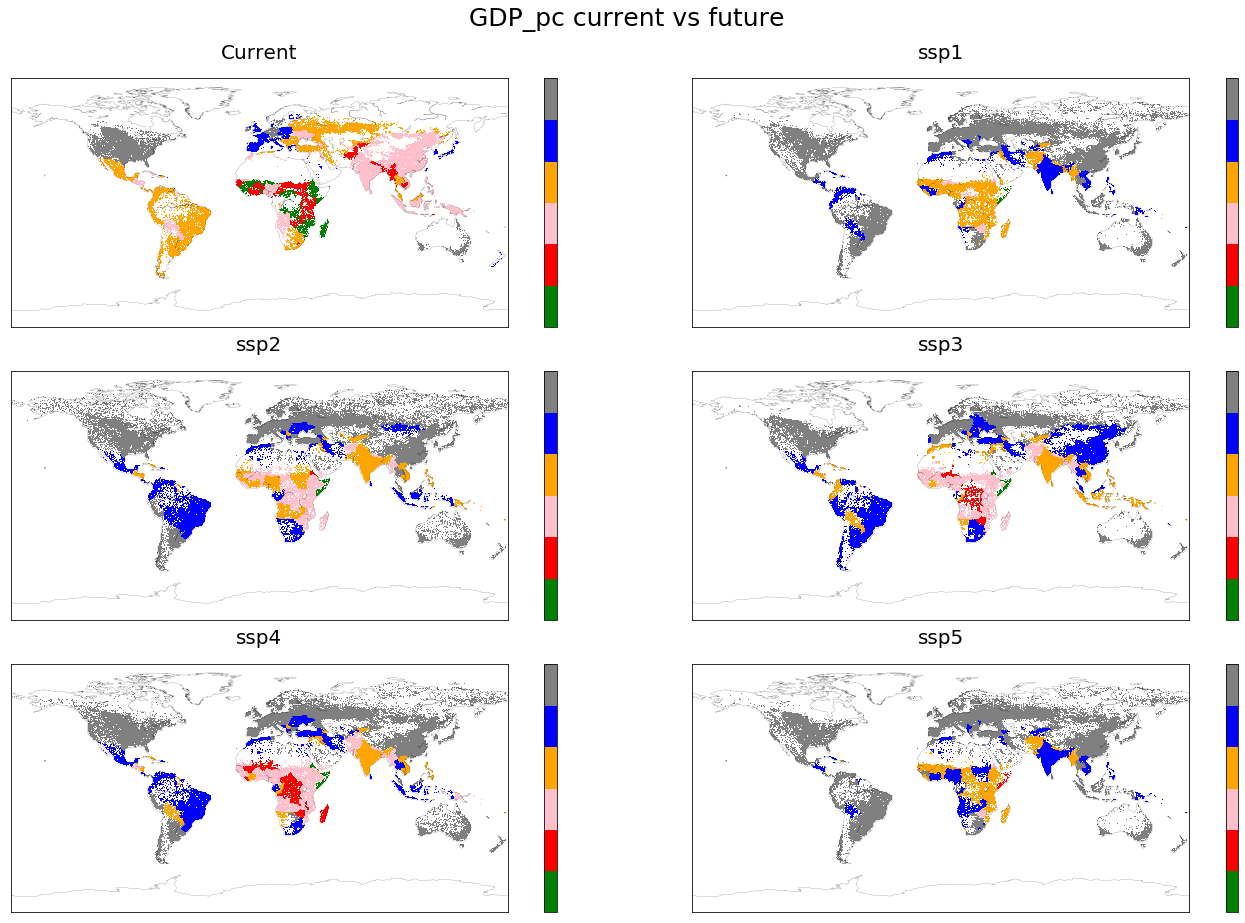

In [96]:
fig = plt.figure(figsize=(20, 13))
fig.suptitle('GDP_pc current vs future', fontsize=25)

min_val = 0
max_val = 5

title_2000 = 'Current'
ax = plt.subplot(321)
plot_gdp(original_df['cat_gdp'], min_val, max_val, fig, ax, title_2000, savefig=False)

model = 'cc'
for i, ssp in enumerate(climate_scenarios): 
    df_2050 = pd.read_csv(data_2050_gdp_stat_path + '{}_{}_gdp_cat_new.csv'.format(model, ssp), index_col='pixel_id', na_values=[-9999])
    df_2050_gdp_pc = df_2050['log_GDP_pc'].apply(lambda v: np.exp(v)).rename('GDP_pc')
    df_2050['cat_gdp'] = pd.cut(df_2050_gdp_pc, buckets, labels=range(n_buckets))
    
    ax = plt.subplot(321 + i + 1)
    title = ssp
    plot_gdp(df_2050['cat_gdp'], min_val, max_val, fig, ax, title, savefig=False)

fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig('../Romain/figures/outline/features/gdp_corrected.png', dpi=500)    

In [97]:
for i, ssp in enumerate(climate_scenarios): 
    df_2050 = pd.read_csv(data_2050_gdp_stat_path + '{}_{}_gdp_cat_new.csv'.format(model, ssp), index_col='pixel_id', na_values=[-9999])
    df_2050_gdp_pc = df_2050['log_GDP_pc'].apply(lambda v: np.exp(v)).rename('GDP_pc')
    print(ssp, df_2050_gdp_pc.max())

/Users/Romain/anaconda3/envs/food_sufficiency/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


ssp1 115.90064552343524
ssp2 118.01237819331057
ssp3 119.61459897867229
ssp4 151.5585610708312
ssp5 194.17353368880268


In [100]:
for model in climate_models:
    for ssp in climate_scenarios: 
        df_2050 = pd.read_csv(data_2050_gdp_stat_path + '{}_{}_gdp_cat_new.csv'.format(model, ssp), index_col='pixel_id', na_values=[-9999])
        df_2050_gdp_pc = df_2050['log_GDP_pc'].apply(lambda v: np.exp(v)).rename('GDP_pc')
        df_2050['cat_gdp'] = pd.cut(df_2050_gdp_pc, buckets, labels=range(n_buckets))
        #df_2050.to_csv(data_2050_gdp_stat_path + '{}_{}_gdp_cat_stat.csv'.format(model, ssp))

In [103]:
df_2000 = pd.reads_csv(data_2000_path + 'normalized_2000_gdp_cat_new.csv', index_col='pixel_id').drop(['log_GDP_pc'], axis=1)
original_df = pd.read_csv(data_2000_path + 'baseline_df.csv', index_col='pixel_id', na_values=[-9999])
df_2000['calories_per_ha'] = original_df['log_calories_per_ha'].apply(lambda v: np.exp(v))
#df_2000.to_csv(data_2000_path + 'normalized_2000_gdp_cat_new.csv')